In [1]:
#import_essetial_packages
#load_Boston_Dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import statsmodels.api as sm
df=pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [2]:
#Basic statical decription of Boston housing dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
#Initial Stage of appending rows 
datarowsSeries = [pd.Series([0.069,10,2.3,0,0.53,6.5,65.2,4.01,1,290,15,395,4.9,24],index=df.columns),pd.Series([50.69,60,2.8,0,1,7,65.7,4.6,1,340,65,445,5.4,74.3],index=df.columns),pd.Series([50.68,61,2.9,0,1.1,7.1,65.6,4.5,1,341,62,440,4.7,74.2],index=df.columns),pd.Series([50.67,62,3,0,0,7.2,65.8,4.7,1,342,64,442,4.8,74.1],index=df.columns ),pd.Series([50.66,63,2.9,0,1.2,7.1,65.9,4.7,1,343,66,441,4.9,74.2],index=df.columns)]


In [4]:
#Create new dataset by adding 5 rows
df2 = df.append(datarowsSeries , ignore_index=True)
df2.shape


C:\Users\anikr\AppData\Local\Temp\ipykernel_30284\2855029484.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df.append(datarowsSeries , ignore_index=True)


(511, 14)

In [5]:
#Statical Description after adding rows
df2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,491.000000,491.000000,491.000000,491.000000,511.000000,511.000000,491.000000,511.000000,511.000000,511.000000,511.000000,511.000000,491.000000,511.000000
mean,3.988065,11.619145,10.999430,0.069246,0.556763,6.291438,68.489206,3.801960,9.465753,407.483366,18.807241,357.416947,12.636253,22.940117
std,9.655607,23.705454,6.851989,0.254132,0.125238,0.702943,27.857805,2.096674,8.705323,167.893019,4.583205,91.172889,7.162067,10.224124
min,0.006320,0.000000,0.460000,0.000000,0.000000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081930,0.000000,5.130000,0.000000,0.449000,5.887500,45.500000,2.102150,4.000000,279.500000,17.400000,375.695000,6.910000,17.100000
50%,0.259150,0.000000,8.560000,0.000000,0.538000,6.211000,76.500000,3.262800,5.000000,330.000000,19.100000,391.700000,11.340000,21.200000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.630000,93.850000,5.118000,24.000000,666.000000,20.200000,396.290000,16.920000,25.050000
max,88.976200,100.000000,27.740000,1.000000,1.200000,8.780000,100.000000,12.126500,24.000000,711.000000,66.000000,445.000000,37.970000,74.300000


In [6]:
#Change the name of dependent variable to 'PRICE' from 'MEDV'
df2.rename(columns = {'MEDV':'PRICE'}, inplace = True)
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,NaN,36.2


In [7]:
#Checking all the variables Type
for column in df2.columns:
    print(f"{column}: {df2[column].dtype}")

CRIM: float64
ZN: float64
INDUS: float64
CHAS: float64
NOX: float64
RM: float64
AGE: float64
DIS: float64
RAD: float64
TAX: float64
PTRATIO: float64
B: float64
LSTAT: float64
PRICE: float64


In [8]:
#checking Null values in every column
df2.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
PRICE       0
dtype: int64

<AxesSubplot:>

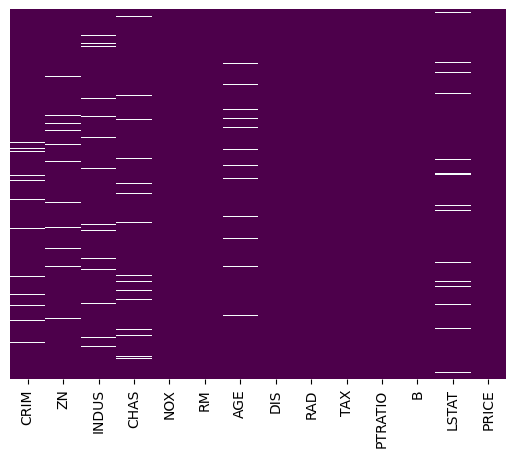

In [9]:
#Heat map of Null values in each column
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='BuPu_r')

In [10]:
#Fill the Null space 
#For Numerical Variable --> Median Value
#For Categorical Variable---> Mode Value
df3=df2.fillna({'CRIM':0.26,'ZN':0,'INDUS':8.56,'CHAS':0,'AGE':68,'LSTAT':22.94})


In [11]:
df3.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
#Statical Summary
df3.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.842152,11.164384,10.903953,0.066536,0.556763,6.291438,68.470059,3.801960,9.465753,407.483366,18.807241,357.416947,13.039530,22.940117
std,9.492015,23.345201,6.732965,0.249461,0.125238,0.702943,27.306276,2.096674,8.705323,167.893019,4.583205,91.172889,7.299595,10.224124
min,0.006320,0.000000,0.460000,0.000000,0.000000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083390,0.000000,5.190000,0.000000,0.449000,5.887500,46.500000,2.102150,4.000000,279.500000,17.400000,375.695000,7.160000,17.100000
50%,0.260000,0.000000,8.560000,0.000000,0.538000,6.211000,73.900000,3.262800,5.000000,330.000000,19.100000,391.700000,11.740000,21.200000
75%,3.397665,12.500000,18.100000,0.000000,0.624000,6.630000,93.450000,5.118000,24.000000,666.000000,20.200000,396.290000,17.510000,25.050000
max,88.976200,100.000000,27.740000,1.000000,1.200000,8.780000,100.000000,12.126500,24.000000,711.000000,66.000000,445.000000,37.970000,74.300000


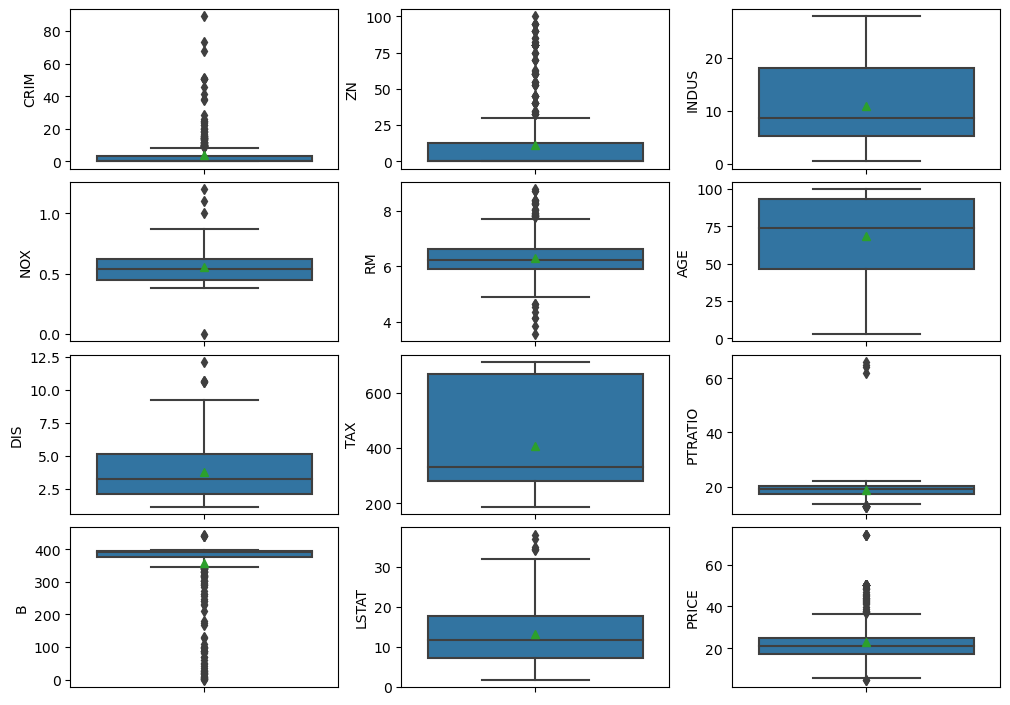

In [13]:
#Box_Plot of every Numerical Variables
df3_box=df3.drop(['CHAS','RAD'],axis=1)
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(10,7))
ax = ax.flatten()
index = 0
for i in df3_box.columns:  
  sns.boxplot(y=i, data=df3_box, ax=ax[index],showmeans=True)
  index +=1
plt.tight_layout(pad=0.5)
plt.show()


C:\Users\anikr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anikr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anikr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

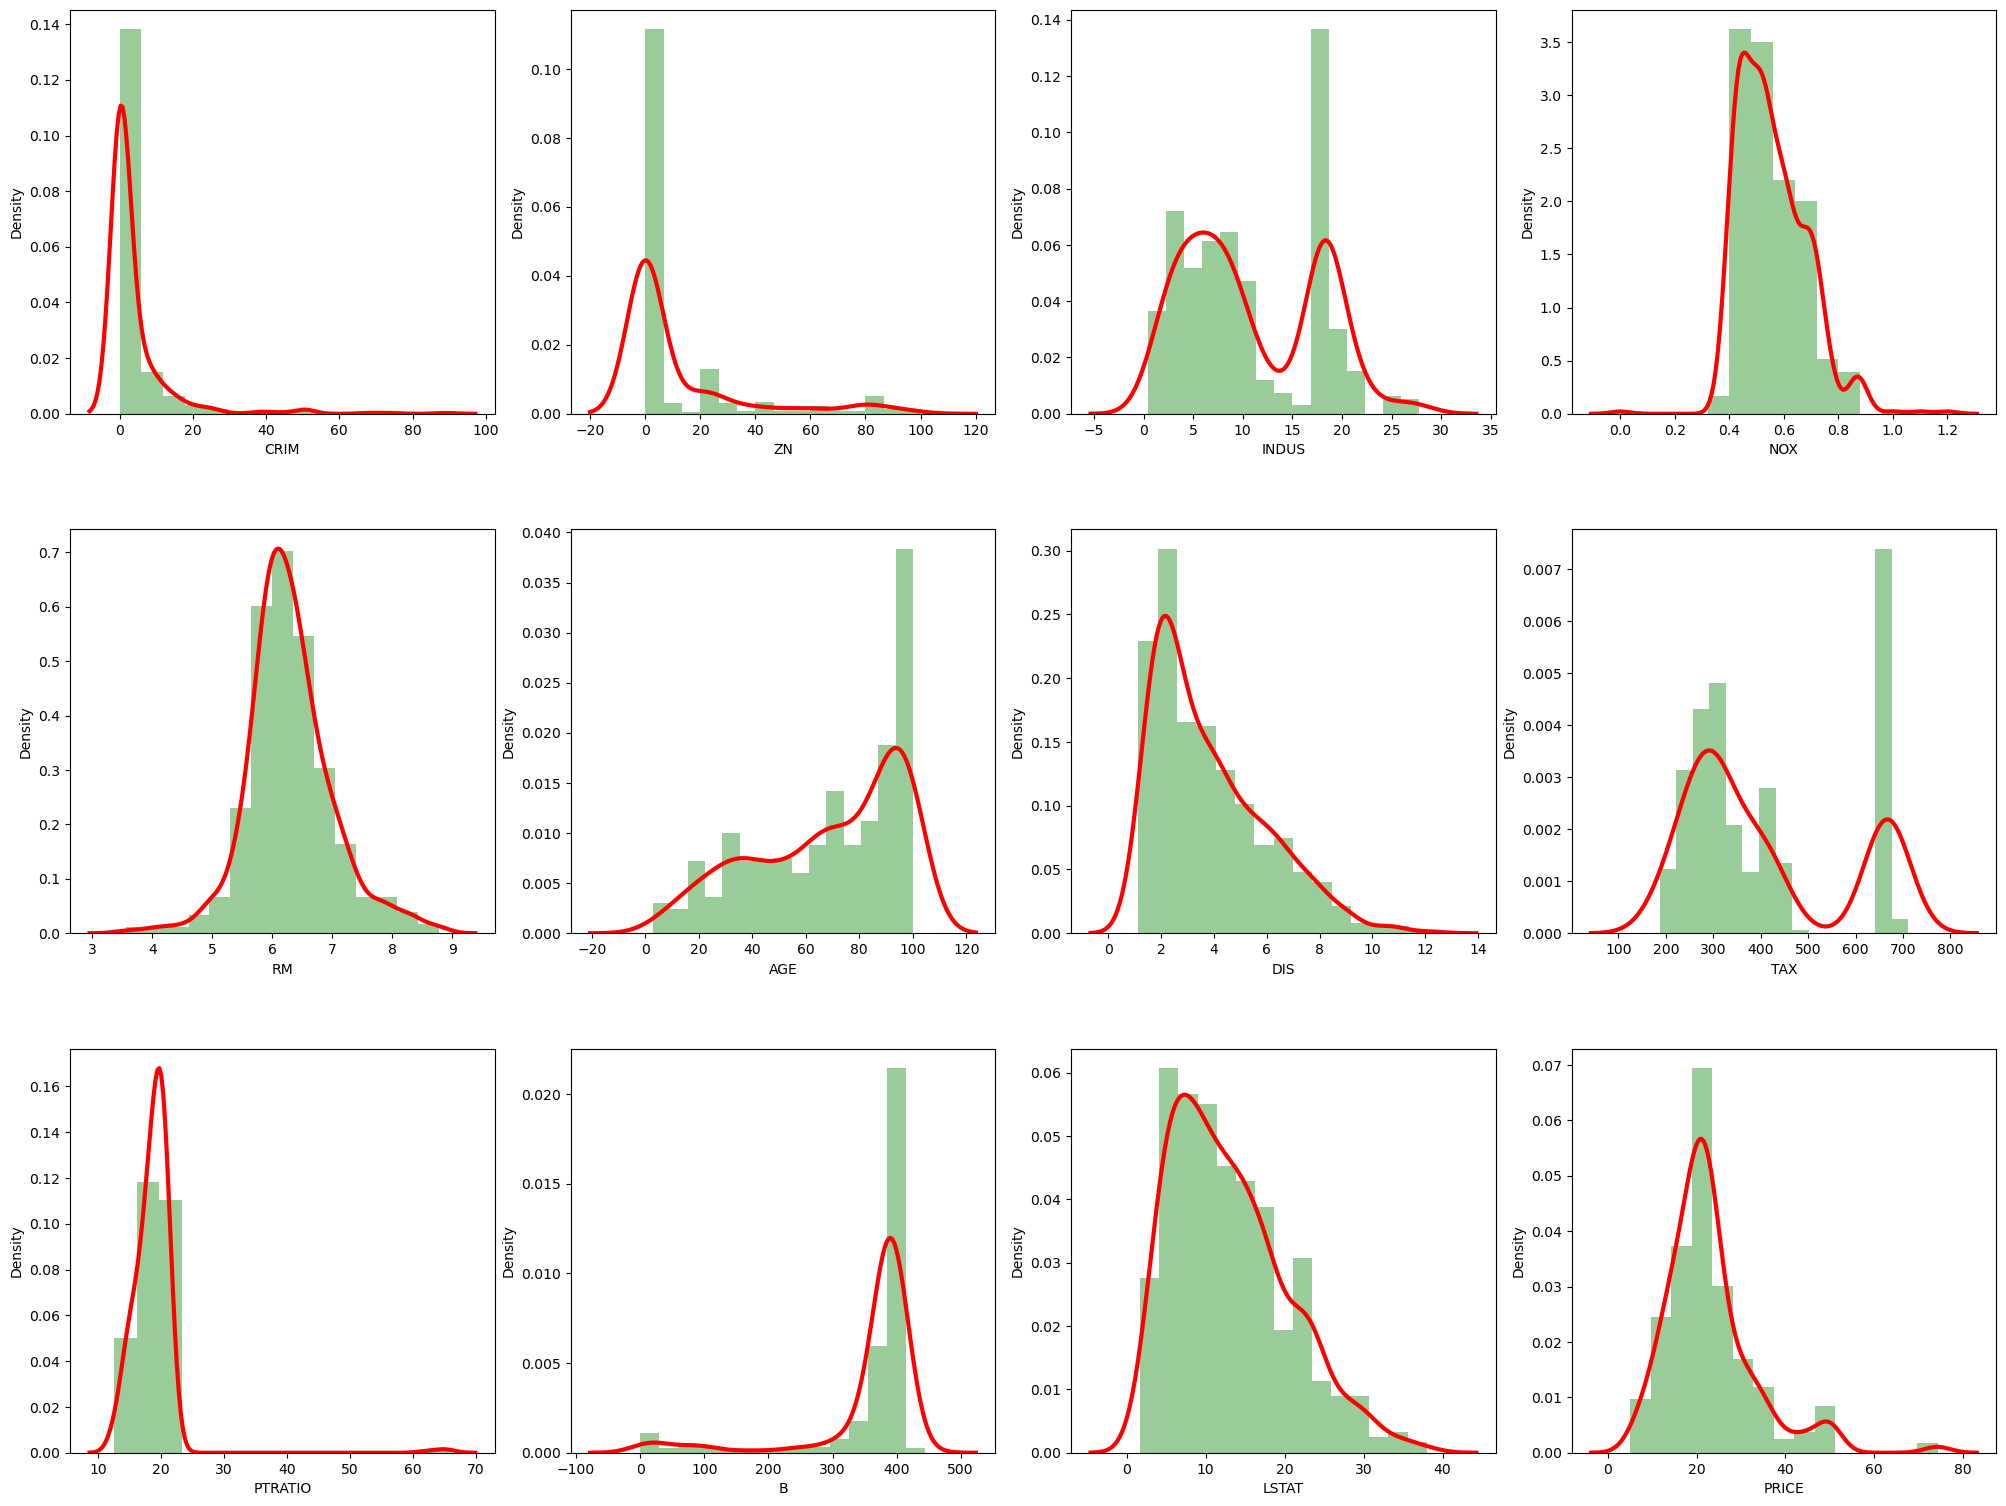

In [14]:
#Histogram of numerical_variables
df3_dist=df3.drop(['CHAS','RAD'],axis=1)
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in df3_dist.items():
    sns.distplot(v, ax=axs[index],color='green',kde_kws={'lw':3,'color':'red'},bins=15)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

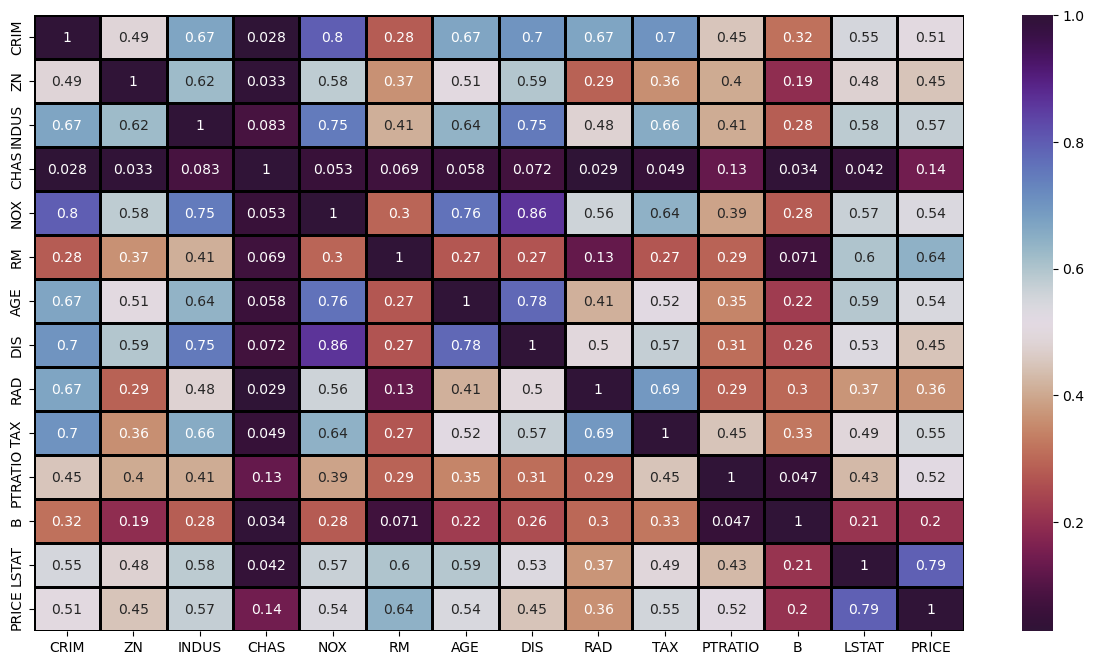

In [15]:
#Heat map of Correaltion between all 14 Variables
plt.figure(figsize=(15, 8))
sns.heatmap(df3.corr(method='spearman').abs(),  annot=True,cmap='twilight_shifted_r',linewidth=2,linecolor='black')

<AxesSubplot:>

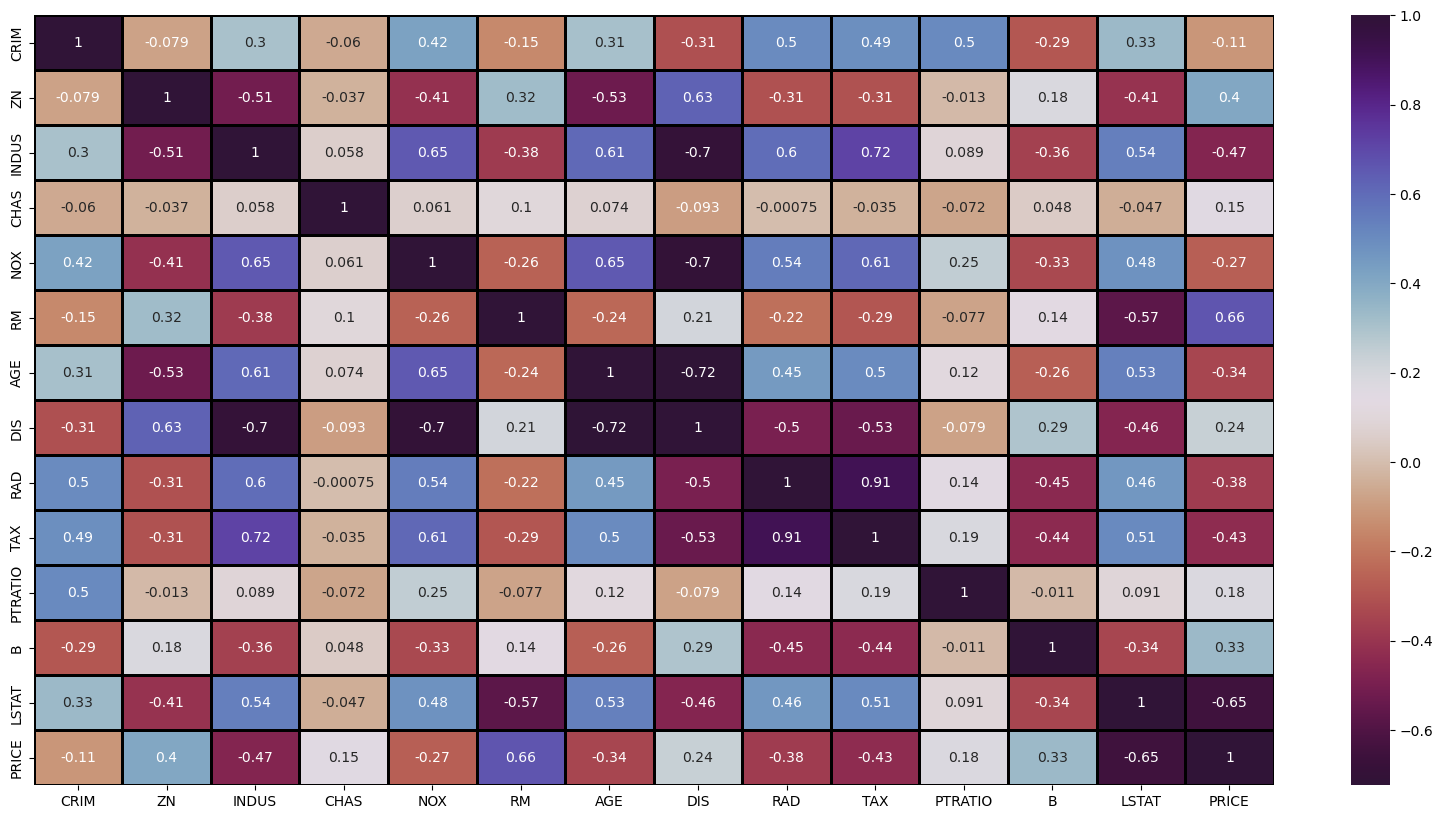

In [16]:
#Heat map of Correaltion between al 14 Variables
plt.figure(figsize=(20, 10))
sns.heatmap(df3.corr(),  annot=True,cmap='twilight_shifted_r',linewidth=2,linecolor='black')

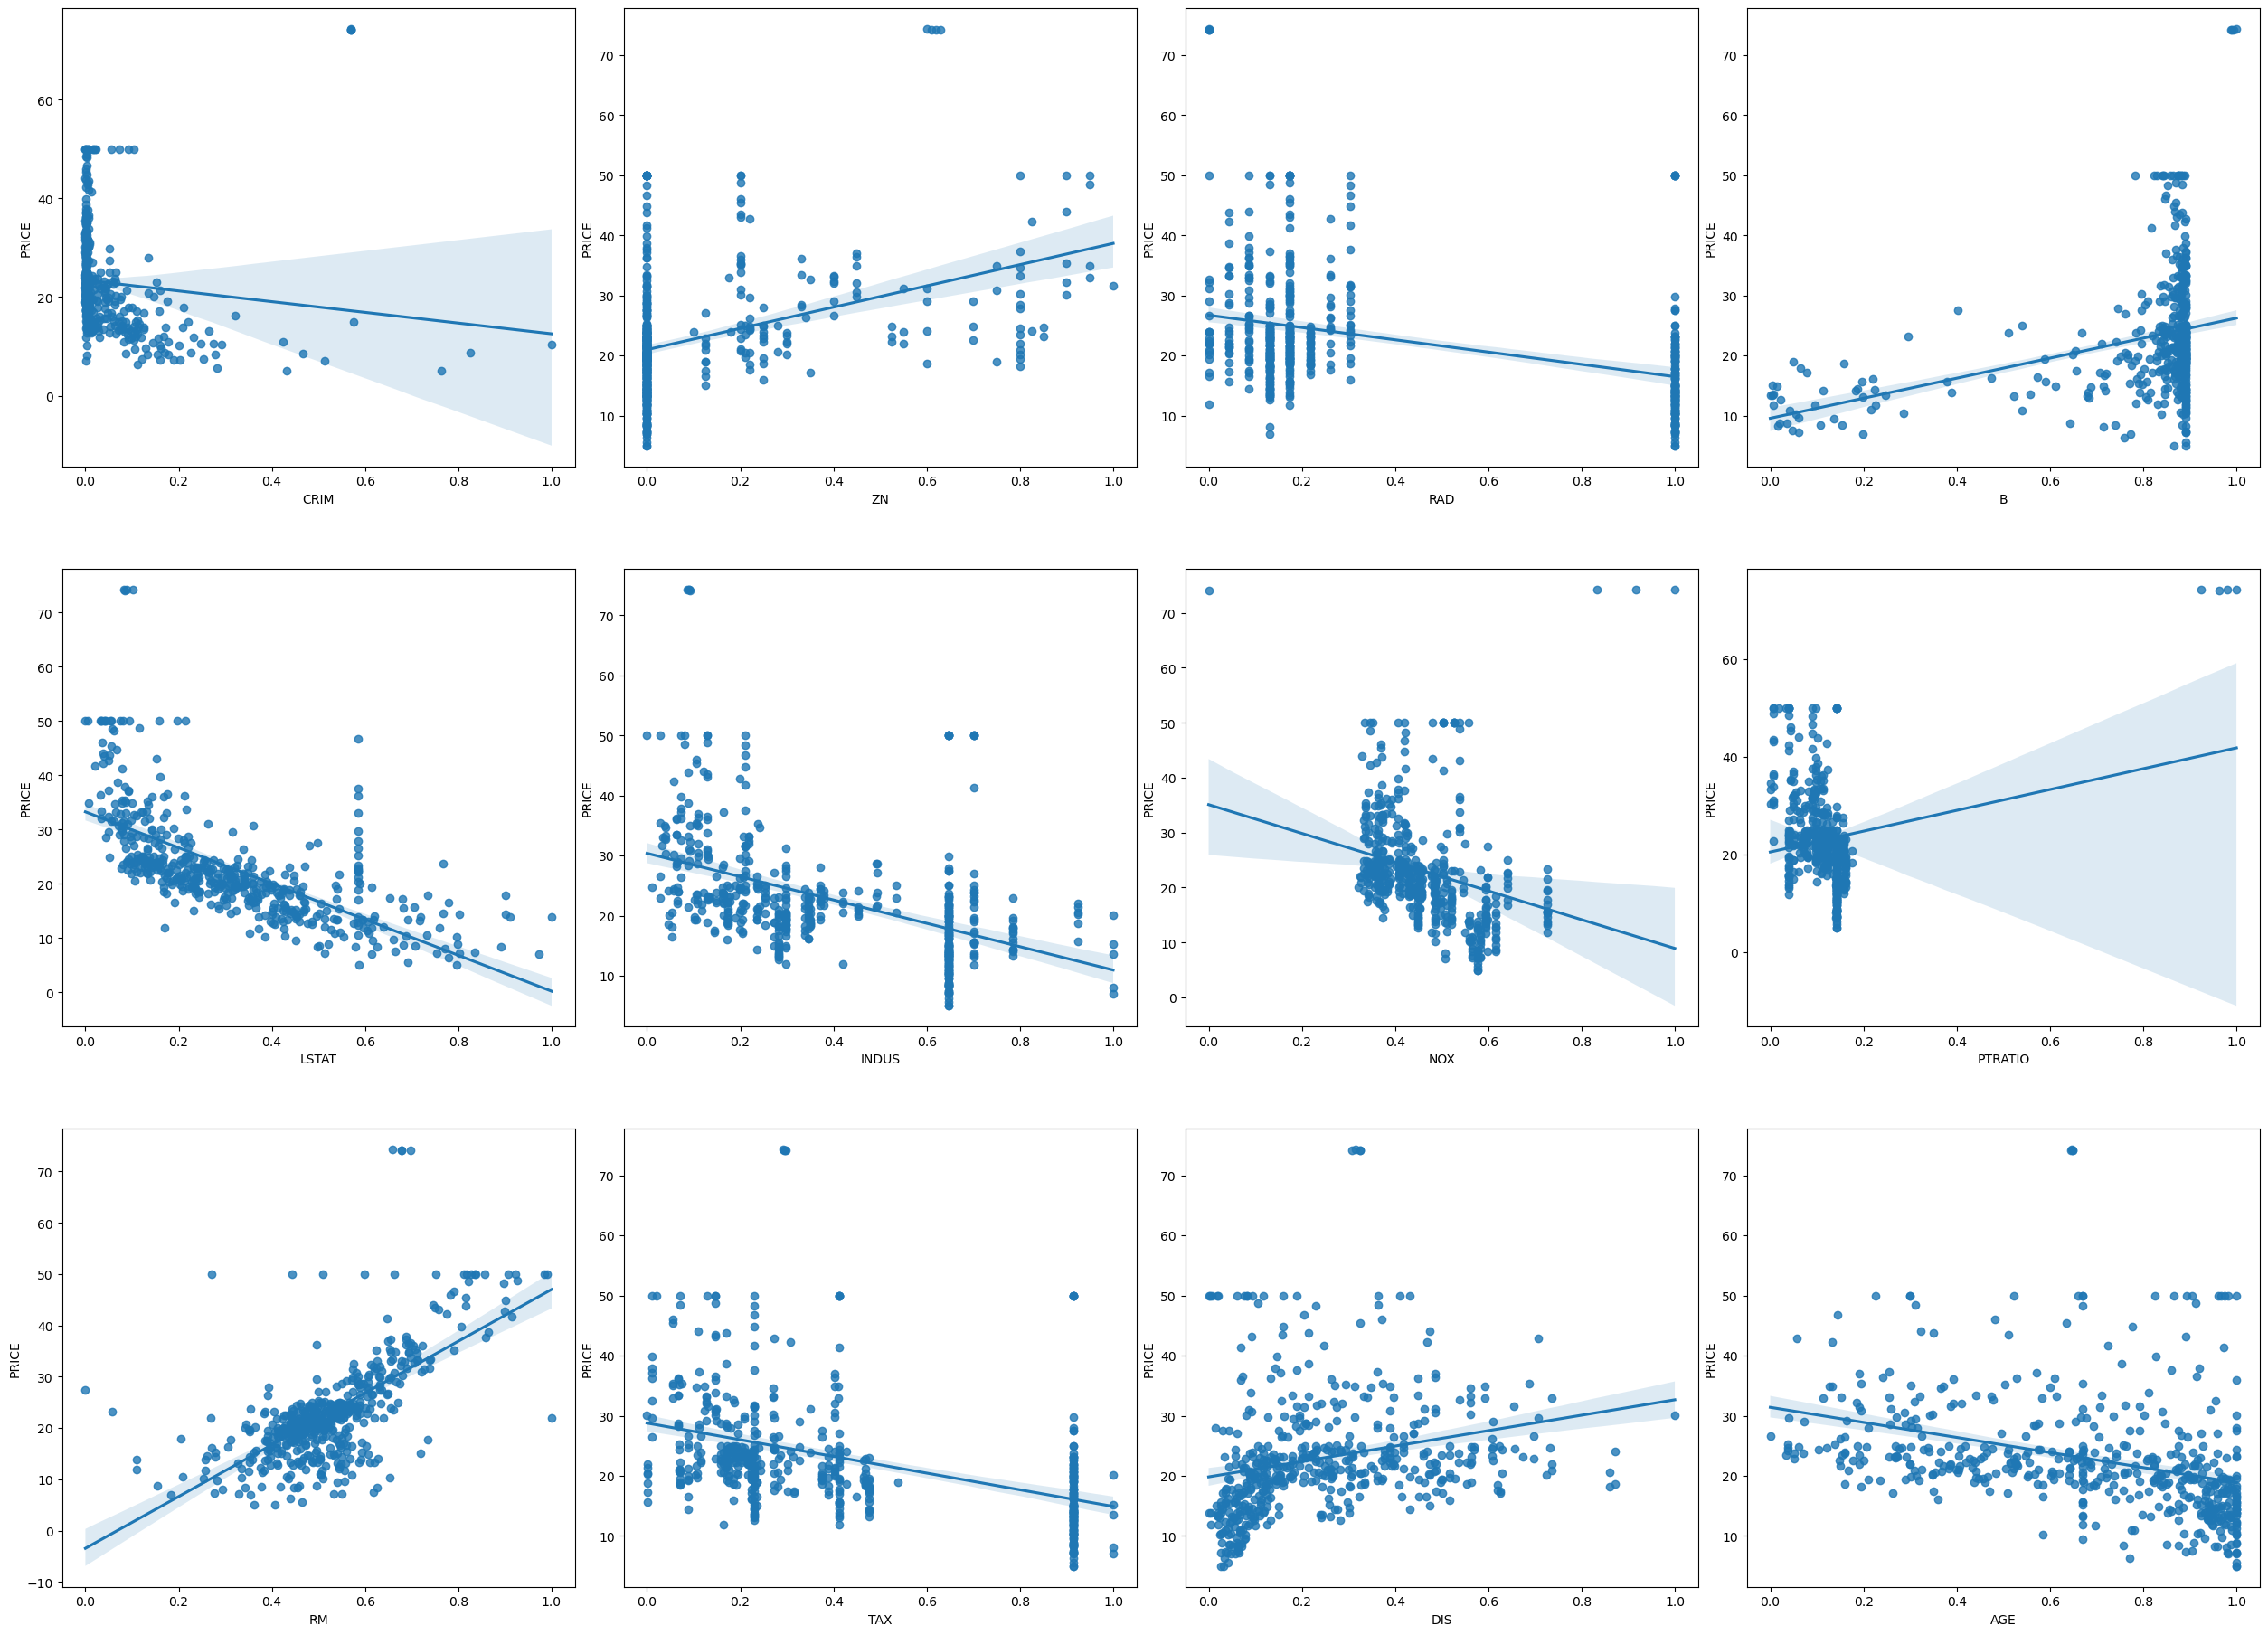

In [17]:
#Scatter Diagram
from sklearn import preprocessing
# Let's scale the columns before plotting them against PRICE
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['CRIM','ZN','RAD','B','LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df3.loc[:,column_sels]
y = df3['PRICE']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25, 18))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [18]:
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,22.94,36.2


In [19]:
df4=df3.copy()
df4['PRICE'] = np.where((df4['PRICE']>=20),1,2)
df4['PRICE'] = df4['PRICE'].map({1:'High', 2:'Low'})


In [20]:
df4.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,High
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,High
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,22.94,High
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,High
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,High
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,High
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,Low
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,Low


In [21]:
df4.PRICE.value_counts()

High    301
Low     210
Name: PRICE, dtype: int64

In [22]:
#sns.pairplot(df4, hue="PRICE", diag_kind="hist", markers=["o", "s"],kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [23]:
#sns.set_style('darkgrid')
#col_to_plot=['INDUS','RM','AGE','DIS','TAX','PTRATIO','LSTAT','PRICE']
#sns.pairplot(df4[col_to_plot],hue="PRICE", diag_kind="kde",markers=["o", "s"],kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [24]:
df4['PRICE'] = df4['PRICE'].map({'High':1,'Low':0})
df4.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,22.94,1


In [42]:

# Arrange data
X = df4.drop('PRICE',axis='columns') 
y = df4['PRICE']

# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50) # 70% training and 30% test


In [43]:
y_train

213    1
3      1
491    0
35     0
410    0
      ..
289    1
109    0
395    0
480    1
176    1
Name: PRICE, Length: 357, dtype: int64

In [44]:
################# DT #################################################
from sklearn import tree
DTclf=tree.DecisionTreeClassifier()

DTclf.fit(X_train, y_train)
y_pred= DTclf.predict(X_test) ##y_test
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('############# DT ###############')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred,labels=(1,0)))
print(accuracy_score(y_test, y_pred))


############# DT ###############
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        66
           1       0.85      0.91      0.88        88

    accuracy                           0.86       154
   macro avg       0.86      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154

[[80  8]
 [14 52]]
0.8571428571428571


<AxesSubplot:>

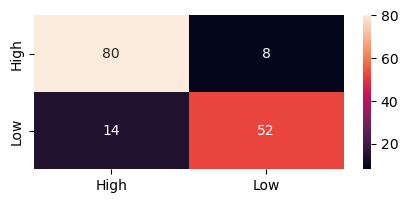

In [45]:
cm_DT=confusion_matrix(y_test, y_pred,labels=(1,0))
labels=['High', 'Low']
plt.figure(figsize=(5,2))
sns.heatmap(cm_DT, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

In [29]:
print('Prediction with DT :', DTclf.predict(X_test))

Prediction with DT : [0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 0 0 0 1 1]


In [46]:
from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier(n_estimators=101)

RFclf.fit(X_train, y_train)
y_pred=RFclf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,roc_curve
print('############# RF ###############')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred,labels=(1,0)))
print(accuracy_score(y_test, y_pred))

############# RF ###############
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        66
           1       0.86      0.90      0.88        88

    accuracy                           0.86       154
   macro avg       0.86      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154

[[79  9]
 [13 53]]
0.8571428571428571


<AxesSubplot:>

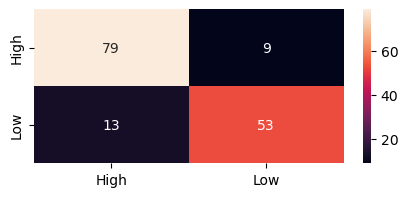

In [47]:
cm_RF=confusion_matrix(y_test, y_pred,labels=(1,0))
labels=['High', 'Low']
plt.figure(figsize=(5,2))
sns.heatmap(cm_RF, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

In [32]:
print('Prediction with RF :', RFclf.predict(X_test))

Prediction with RF : [0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 0 0 0 0 1]


In [33]:
y_test

391    1
160    1
368    1
502    1
430    0
      ..
383    0
399    0
9      0
18     1
295    1
Name: PRICE, Length: 154, dtype: int64

In [48]:
from sklearn.svm import SVC
SVclf = SVC(kernel='poly', degree=3)

SVclf.fit(X_train, y_train)
y_pred=SVclf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , roc_curve
print('############# SVM ###############')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred,labels=(1,0)))
print(accuracy_score(y_test, y_pred))

############# SVM ###############
              precision    recall  f1-score   support

           0       0.83      0.53      0.65        66
           1       0.72      0.92      0.81        88

    accuracy                           0.75       154
   macro avg       0.78      0.73      0.73       154
weighted avg       0.77      0.75      0.74       154

[[81  7]
 [31 35]]
0.7532467532467533


<AxesSubplot:>

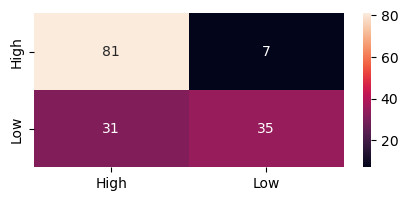

In [49]:
cm_svm=confusion_matrix(y_test, y_pred,labels=(1,0))
labels=['High', 'Low']
plt.figure(figsize=(5,2))
sns.heatmap(cm_svm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

In [36]:
print('Prediction with SVM :', SVclf.predict(X_test))

Prediction with SVM : [0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 1 0 0 1 1 1]


In [50]:
############################### Logistic Regression ###########################
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred=logmodel.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('############# Logistic Reg ###############')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred,labels=(1,0)))
print(accuracy_score(y_test, y_pred))

############# Logistic Reg ###############
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        66
           1       0.87      0.88      0.87        88

    accuracy                           0.85       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.85      0.85      0.85       154

[[77 11]
 [12 54]]
0.8506493506493507


C:\Users\anikr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

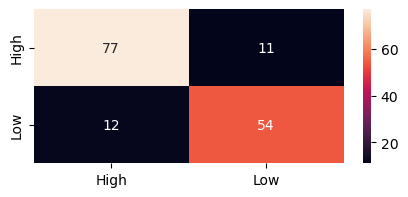

In [51]:
cm_LGT=confusion_matrix(y_test, y_pred,labels=(1,0))
labels=['High', 'Low']
plt.figure(figsize=(5,2))
sns.heatmap(cm_LGT, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

In [39]:
print('Prediction with Logistic :', logmodel.predict(X_test))

Prediction with Logistic : [0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1
 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 0 0 0 1 1]


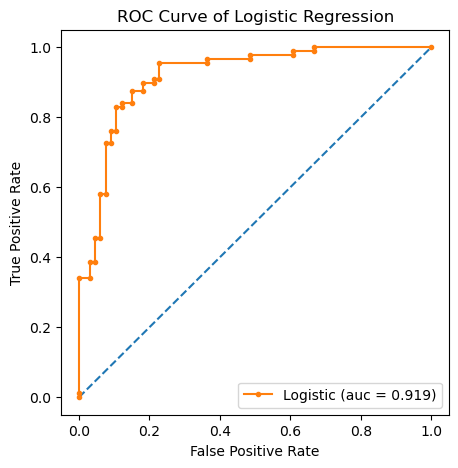

In [40]:
# ROC Curve of Logistic Regression and AUC
from sklearn.metrics import roc_curve,auc
probs_logistic = logmodel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs_logistic)
auc_logistic = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(5,5),dpi=100)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend()
plt.show()

In [41]:
roc_auc_score(y_test,probs_logistic )

NameError: name 'roc_auc_score' is not defined

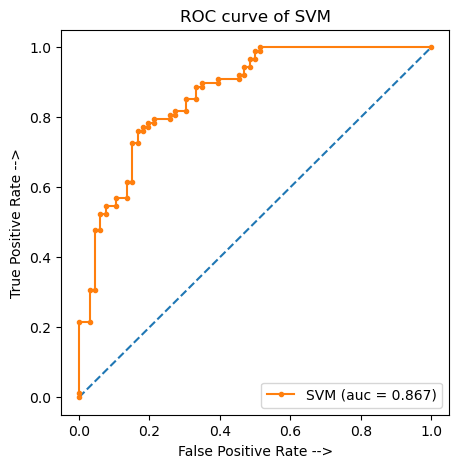

In [52]:
# ROC Curve of SVM and AUC
from sklearn.metrics import roc_curve, auc
y_pred_SVM=SVclf.decision_function(X_test)
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_SVM)
auc_svm = auc(svm_fpr, svm_tpr)
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(svm_fpr, svm_tpr, marker='.',label='SVM (auc = %0.3f)' % auc_svm)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC curve of SVM')
plt.legend(loc=4)
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_SVM )

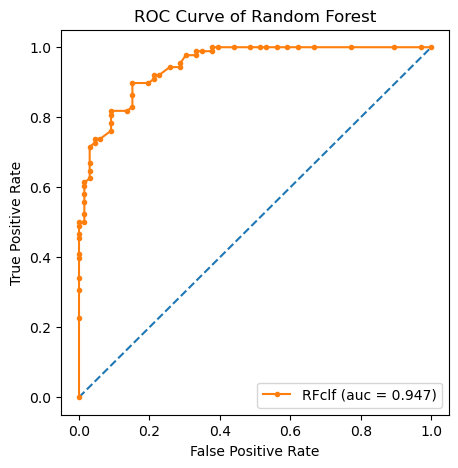

In [53]:
# ROC Curve of Random Forest and AUC
from sklearn.metrics import roc_auc_score
probs_RFclf =RFclf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs_RFclf)
auc_RfR = auc(fpr, tpr)
#roc_auc_score(y_test,probs )
# Plot ROC curve
plt.figure(figsize=(5,5),dpi=100)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='RFclf (auc = %0.3f)' % auc_RfR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.legend(loc=4)
plt.show()

In [ ]:
roc_auc_score(y_test,probs_RFclf )

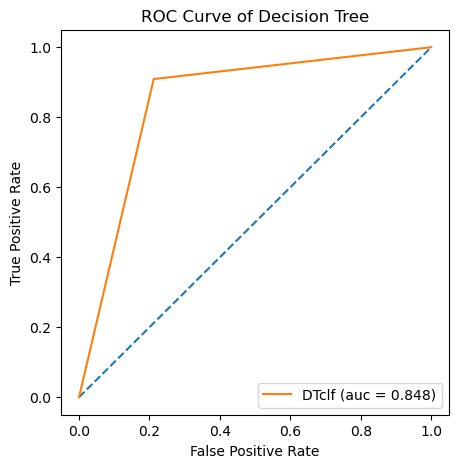

In [54]:
# ROC Curve of Decision Tree and AUC
probs_DTclf =DTclf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs_DTclf)
auc_DTcl = auc(fpr, tpr)
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='-', label='DTclf (auc = %0.3f)' % auc_DTcl)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.legend(loc=4)
plt.show()

In [ ]:
#y_pred_logistic = logmodel.decision_function(X_test_scaled)
y_pred_SVM=SVclf.decision_function(X_test)
#y_pred_DT=DTclf.decision_function(X_test_scaled)

In [ ]:
from sklearn.metrics import roc_curve, auc

#logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
#auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_SVM)
auc_svm = auc(svm_fpr, svm_tpr)

#dt_fpr, dt_tpr, threshold = roc_curve(y_test1, y_pred_dt)
#auc_dt = auc(dt_fpr, dt_tpr)


plt.figure(figsize=(5,5), dpi=100)
#plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(svm_fpr, svm_tpr, marker='.',label='SVM (auc = %0.3f)' % auc_svm)
#plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Randomforest (auc = %0.3f)' % auc_dt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC curve of SVM')
plt.legend()

plt.show()
 #label='SVM (auc = %0.3f)' % auc_svm)

In [ ]:
#Random forest model using entire dataset
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X, y)
importances = rf.feature_importances_
print('Feature Importances:', importances)

In [ ]:
plt.figure(figsize=(10,5))
c=['yellow','red','blue','purple','cyan','orange','blue','black','pink','yellow','red','orange','red']
plt.bar(range(len(importances)), importances,color=c)
plt.xticks(range(len(importances)), X.columns, rotation=45)
plt.ylabel('Importance value')
plt.title('Feature Importances of Random Forest model')
plt.show()

In [ ]:
color=['yellow','red','blue','purple','cyan','orange','blue','black','pink','yellow','red','orange','red']

In [ ]:
%pip install pydotplus

In [ ]:
estimator = rf.estimators_[5]

In [ ]:
from six import StringIO 
from IPython.display import Image  
from sklearn.ensemble import export_graphviz
import pydotplus
tree = rf.estimators_[0]
export_graphviz(rf, out_file='tree.dot',
                feature_names = X.columns,
                class_names = y,
                filled=True, rounded=True,
                special_characters=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
clf = RandomForestClassifier(n_estimators=1)
clf.fit(X,y)
clf.estimators_
plt.figure(figsize=(10,10))
tree.plot_tree(clf.estimators_[0])
plt.figure(figsize=(10,10))
for i in range(len(clf.estimators_)):
    tree.plot_tree(clf.estimators_[i])
    plt.savefig('fig'+str(i))
    plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

# from sklearn.externals.six import StringIO 
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
conda install graphviz

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier(n_estimators=100)

RFclf.fit(X,y)
RFclf.estimators_
fn=X.columns
cn=y
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(RFclf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')


In [ ]:
from six import StringIO 
from IPython.display import Image  
from sklearn.ensemble import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(RFclf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
RFclf_w = RandomForestClassifier(n_estimators=100, random_state=42)
RFclf_w.fit(X, y)

dt = RFclf_w.estimators_[0]
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)

plt.figure(figsize=(10,10))
tree.plot_tree(dt, filled=True, class_names=['High','Low'], feature_names=X.columns)
plt.show()
